In [426]:
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

%matplotlib inline

# Set dataframe options to keep long data in columns from being truncated with ellipsis (...)
pd.set_option('max_colwidth', None)

# Set dataframe options to force display max columns
pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 90)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:

photos_json = '../yelp_dataset/photos.json'
business_json = '../yelp_dataset/yelp_academic_dataset_business.json'
tip_json = '../yelp_dataset/yelp_academic_dataset_tip.json'
checkin_json = '../yelp_dataset/yelp_academic_dataset_checkin.json'
user_json = '../yelp_dataset/yelp_academic_dataset_user.json'
review_json = '../yelp_dataset/yelp_academic_dataset_review.json'


In [520]:

def create_dataframe(file_path):

    data = []
    with open(file_path, encoding="utf8") as f:
        for jsonObj in f:
            data.append(json.loads(jsonObj))
    return pd.DataFrame(data)

def df_info(df):
    '''
    A helper function - similar in functionality with `df.info()` but includes combined features: df.columns, df.dtypes, 
    df.isnull(), df.info(), df.nunique()
    '''
    print('\nShape : {}'.format(df.shape))
    #print('Number of duplicates : {}\n'.format(df.duplicated().sum()))

    print('{:^35} {:^12} {:^12} {:^8} {:>10}\n'.format('COLUMNS', 'DATA TYPE', 'HAS NULL', 'COUNTS', '# UNIQUE'))
    for i, v in enumerate(df.columns):
        col = df[v]
        dtype = type(col.iloc[0]).__name__
        
        if dtype=='dict':
            keys = set([item for val in col.values if val is not None for item in list(val.keys())])
            col_nunique = len(keys)
        else:
            col_nunique = col.nunique()
        
        print(' {:>2}.  {:<30} {:<12} {:^10} {:>8} {:>10}'.format(i+1, v, dtype, \
                                                                  str(col.isnull().any()), col.count(), \
                                                                  col_nunique))    # col.nunique()

In [7]:

photos_df = create_dataframe(photos_json)
business_df = create_dataframe(business_json)
tip_df = create_dataframe(tip_json)
checkin_df = create_dataframe(checkin_json)
user_df = create_dataframe(user_json)
review_df = create_dataframe(review_json)

In [10]:
business_df.sample(1)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
169140,1XBz38nxlCTsvzmPFbwIfw,Just Fore Fun Golf Center,301 Eisner Rd,Champaign,IL,61822,40.137934,-88.236009,4.0,4,1,{'GoodForKids': 'True'},"Golf, Active Life",None


In [117]:
photos_df.sample(3)
df_info(photos_df)


,photo_id,business_id,caption,label
46313,cbCbpokeAGyv3L-5V7PytQ,DmLGiQ4zR1-FTS52K9_rbw,Mexican Tres Leches Pancakes,food
101788,KV6ZDhpL52JJzV0USPJgYQ,KDF3qxIYv1OkqtSUl4PwGQ,,inside
135771,Q3Qk6vJx343FNIcWcUhbrg,Q6F59ID2Js8Sop2vRcVz-w,,food



Shape : (200000, 4)
              COLUMNS                DATA TYPE     HAS NULL    COUNTS    # UNIQUE

photo_id
  1.  photo_id                       object         False      200000     200000
business_id
  2.  business_id                    object         False      200000      39830
caption
  3.  caption                        object         False      200000      72475
label
  4.  label                          object         False      200000          5


In [12]:
tip_df.sample(3)
df_info(tip_df)

,user_id,business_id,text,date,compliment_count
126565,je5k8a3qIOM0VJE5MaxsfQ,G1-GNV1U_1JGMiqDF8Nnvg,Both John and Alex have been terrific to deal with and the bikes they have for rent and sale are goregous!,2011-02-18 17:23:40,0
875840,miw0Vdxms7aLLU5ibcffXg,6_I6OKHIGpLuBdvnqtDuog,Awesome. Unassuming. Pie. \n\nPeriod. End of sentence.,2014-11-30 01:01:28,0
1299308,lSC7u4fk2xnKWmdoCs40LQ,QDRFdG8gPPKL7r4yic8j7Q,no deliver anymore.,2013-03-30 03:46:18,0



Shape : (1320761, 5)
Number of duplicates : 156

              COLUMNS                DATA TYPE     HAS NULL    COUNTS    # UNIQUE

  1.  user_id                        object         False     1320761     365869
  2.  business_id                    object         False     1320761     132700
  3.  text                           object         False     1320761    1233082
  4.  date                           object         False     1320761    1315938
  5.  compliment_count               int64          False     1320761         13


In [13]:
checkin_df.sample(3)
df_info(checkin_df)

,business_id,date
137837,mJHoOJH10A-cjtRdQCV6ow,"2010-10-06 19:32:19, 2010-11-05 18:33:59, 2010-11-16 18:38:53, 2010-11-30 00:32:13, 2010-11-30 21:06:55, 2011-02-04 19:44:47, 2011-02-09 20:06:37, 2011-03-05 22:49:09, 2011-03-22 23:19:26, 2011-04-01 22:38:23, 2011-04-09 18:55:50, 2011-05-15 00:39:59, 2011-05-23 20:18:18, 2011-05-24 20:35:36, 2011-05-28 19:48:02, 2011-05-28 20:33:47, 2011-06-10 01:50:16, 2011-06-18 20:56:12, 2011-06-18 21:00:59, 2011-06-22 01:48:20, 2011-07-01 22:03:55, 2011-07-14 19:08:51, 2011-07-26 01:54:41, 2011-08-04 20:35:10, 2011-08-20 19:34:52, 2011-08-26 21:44:15, 2011-09-08 18:46:16, 2011-09-08 18:51:49, 2011-09-09 01:24:07, 2011-09-09 19:43:09, 2011-09-12 20:40:30, 2011-09-15 18:37:04, 2011-09-26 19:29:10, 2011-10-11 23:09:21, 2011-10-22 22:03:09, 2011-10-22 22:36:21, 2011-11-05 21:09:50, 2011-11-17 22:52:36, 2011-12-13 19:11:30, 2011-12-26 20:21:21, 2012-02-18 00:42:21, 2012-03-17 21:25:06, 2012-03-24 19:52:22, 2012-03-31 19:17:23, 2012-04-02 19:24:18, 2012-04-02 23:20:41, 2012-04-20 19:32:04, 2012-05-12 01:20:16, 2012-05-12 20:08:44, 2012-07-14 19:47:01, 2012-07-17 23:15:24, 2012-07-21 19:26:04, 2012-10-21 01:06:32, 2012-10-27 23:04:35, 2012-11-03 16:38:29, 2013-01-13 00:29:51, 2013-01-18 22:22:38, 2013-01-21 21:56:19, 2013-02-15 23:07:10, 2013-02-22 21:27:22, 2013-02-27 19:20:53, 2013-03-29 22:53:20, 2013-04-13 02:57:28, 2013-04-25 19:14:16, 2013-04-27 22:15:39, 2013-05-09 19:59:34, 2013-05-20 18:18:17, 2013-05-22 22:16:28, 2013-07-03 17:58:33, 2013-07-10 18:36:32, 2013-08-27 18:52:59, 2013-08-31 17:48:42, 2013-09-06 20:41:32, 2013-09-06 20:44:29, 2013-09-22 21:59:08, 2013-10-01 20:05:39, 2013-10-11 21:47:51, 2013-10-25 02:46:57, 2013-11-04 20:38:39, 2013-11-04 21:06:38, 2013-11-13 21:57:16, 2013-12-31 20:56:52, 2014-01-03 01:12:48, 2014-01-10 02:00:28, 2014-02-15 22:29:42, 2014-02-16 00:20:10, 2014-03-04 00:21:14, 2014-03-04 00:40:00, 2014-03-13 20:44:06, 2014-03-14 01:23:03, 2014-03-22 22:58:14, 2014-04-02 01:51:16, 2014-04-04 02:45:58, 2014-04-10 20:04:37, 2014-05-03 23:42:27, 2014-06-25 19:54:01, 2014-06-25 21:03:27, 2014-07-25 00:22:12, 2014-08-11 19:38:56, 2014-08-19 18:47:42, 2014-09-27 19:11:44, 2014-10-10 21:33:57, 2014-10-10 21:38:45, 2014-10-31 23:47:03, 2014-11-08 21:30:23, 2014-11-21 20:54:16, 2014-11-21 20:55:31, 2014-11-28 18:34:59, 2014-11-28 22:03:16, 2014-12-10 19:30:59, 2014-12-20 21:12:28, 2015-01-02 19:05:53, 2015-01-03 21:04:31, 2015-01-24 19:46:46, 2015-02-21 01:37:13, 2015-03-06 22:38:46, 2015-03-14 17:49:21"
115251,e3a_sCmg2E0MKwLDLJ3q5Q,"2010-05-29 18:12:08, 2010-06-06 00:17:58, 2011-04-10 00:05:59, 2011-04-16 04:22:08, 2013-08-15 15:22:06, 2013-08-20 21:44:14, 2013-09-27 21:02:44, 2014-04-23 00:27:32, 2014-04-26 16:17:28, 2014-06-24 19:05:36, 2014-07-22 22:45:58, 2014-09-30 21:00:04, 2014-10-08 21:28:58, 2017-04-09 23:39:07"
18378,5jsWjoptbVtGhRfTwThDRQ,2019-07-10 15:18:27



Shape : (175187, 2)
Number of duplicates : 0

              COLUMNS                DATA TYPE     HAS NULL    COUNTS    # UNIQUE

  1.  business_id                    object         False      175187     175187
  2.  date                           object         False      175187     175187


In [14]:
user_df.sample(3)
df_info(user_df)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
1487106,DP9fYqfPVU8SGgmUsUTBSQ,Coree,1,2018-07-14 23:35:12,0,0,0,,nYDQQkFaMxaM7PL80-bhvw,0,5.0,0,0,0,0,0,0,0,0,0,0,0
918623,TH5UDp8WhBCGQLj8ZMpv3Q,Jason,6,2016-04-23 02:08:47,2,0,1,,None,1,4.5,0,0,0,0,0,0,0,0,0,0,0
1915463,Wh9T-U_wLJFnihCiUoU1Pg,Alexis,3,2019-10-03 12:04:24,4,2,3,,AMRICbzaWWS7IQg512rm4g,0,5.0,1,0,0,0,0,0,0,0,0,0,0



Shape : (1968703, 22)
Number of duplicates : 0

              COLUMNS                DATA TYPE     HAS NULL    COUNTS    # UNIQUE

  1.  user_id                        object         False     1968703    1968703
  2.  name                           object         False     1968703     144820
  3.  review_count                   int64          False     1968703       1877
  4.  yelping_since                  object         False     1968703    1960575
  5.  useful                         int64          False     1968703       5112
  6.  funny                          int64          False     1968703       3730
  7.  cool                           int64          False     1968703       4314
  8.  elite                          object         False     1968703        760
  9.  friends                        object         False     1968703    1116786
 10.  fans                           int64          False     1968703        659
 11.  average_stars                  float64        False 

In [15]:
review_df.sample(3)
df_info(review_df)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
7282857,0NxhYLQbzCAMHFqpb8LPAw,6OF61-eD51hgDVuiEge1nQ,OlvsH2r5A82qVVP1eSDNDQ,4.0,1,1,1,Great pizza by the slice with Wisconsin mozzarella for $3.00... nearly ate the whole huge slice. Definitely will be back!,2014-12-19 21:03:31
539826,Nr2k-ijouDXnt-X0n58ohw,veTijdYPfpdoKPs_N3R54w,MOB5oCEKCw3S76SsiuQjqA,5.0,1,0,0,this place is a godsend- the area is a bit of a healthy food desert.\n\nThe red lentil dhal was incredibly flavourful.\n\nP.S. the matcha latte comes without sugar! You can have them add honey to it but so grateful it's clean powder first! Love love love,2018-10-15 17:24:26
4440192,gQ6X-70nizz9_haSpCi2eg,1rm5W-Wy8xd982xy60J0xg,by9Vuifv_1mYzDvwVUReJg,2.0,1,0,0,"Let me start with the restaurant itself hard to find but spectacular views, absolutely gorgeous, unfortunately that is the best thing I can say. We went on a Tuesday evening about 530p so not a ton of people in there only a group of about 10 that were drinking but not eating. It took a bit for the bartender to appear and she was not overly friendly no recommendations. We ordered a couple of glasses of wine they were good. We ordered two appetizers the first being the bacon with bleu cheese stuffed fig. What could go wrong with that you ask? The bacon is cooked on the grill where the outside of the bacon looks crispy the inside fat has not rendered at all. Figs, bleu cheese delicious. The next food item we ordered was a spinach salad with the first ingredient being listed as cheddar, guess what did not come out on our salad. Now I would understand if the kitchen was busy but as I said we were the only people eating at that time and we could see the cooks just talking and standing. This place has some technical problems that need strong management to fix.",2017-05-24 23:28:41



Shape : (8021122, 9)
Number of duplicates : 0

              COLUMNS                DATA TYPE     HAS NULL    COUNTS    # UNIQUE

  1.  review_id                      object         False     8021122    8021122
  2.  user_id                        object         False     8021122    1968703
  3.  business_id                    object         False     8021122     209393
  4.  stars                          float64        False     8021122          5
  5.  useful                         int64          False     8021122        266
  6.  funny                          int64          False     8021122        209
  7.  cool                           int64          False     8021122        200
  8.  text                           object         False     8021122    7999488
  9.  date                           object         False     8021122    7853102


In [16]:
review_df.query('review_id == "jzR2wPoOuR-nZuQ1xiAPNg"')[['user_id']]

,user_id
2354840,nxWrhF_hyX0wwjrEkQX8uQ


In [17]:
review_df.groupby(['user_id']).agg(['count']).sort_values(['user_id'], ascending=True).head(10)

,review_id,business_id,stars,useful,funny,cool,text,date
,count,count,count,count,count,count,count,count
user_id,,,,,,,,
---1lKK3aKOuomHnwAkAow,131,131,131,131,131,131,131,131
---3o4ZsKYoBYBe7H6xG8A,1,1,1,1,1,1,1,1
---89pEy_h9PvHwcHNbpyg,1,1,1,1,1,1,1,1
---94vtJ_5o_nikEs6hUjg,5,5,5,5,5,5,5,5
---PLwSf5gKdIoVnyRHgBA,3,3,3,3,3,3,3,3
---RfKzBwQ8t3wu-LXvx3w,1,1,1,1,1,1,1,1
---cu1hq55BP9DWVXXKHZg,3,3,3,3,3,3,3,3
---fhiwiwBYrvqhpXgcWDQ,1,1,1,1,1,1,1,1


In [18]:
review_df.query('user_id == "---1lKK3aKOuomHnwAkAow"').sample(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
3764760,8UPYEHphVs-tryW3vDLy5w,---1lKK3aKOuomHnwAkAow,iPM85PQMs7QoAxw-Og9ChQ,3.0,1,0,0,"The food is always okay, the service ok, and the the drinks okay. It is close to my work and the spot we head to after outfitting the next generation of outdoor enthusiasts.",2010-11-16 03:15:16
6454400,FzYG7dTZTU3TWf8-JEnGaw,---1lKK3aKOuomHnwAkAow,5FPQOwwPkBEiy8df8d0SPQ,5.0,5,1,1,"20 min root canal and he called to check in on me. I hear he has 6 kids yet he still called and checked in. I call him the sharpshooter of endodontics, because he is fast. Fast means no pain. I had one before and it took 2 hours over 2 days. \n\nThey are also really anal about cleaning, never ask his assistant or she will tell you more than you ever wanted to know about unhygienic dental offices.",2010-11-27 05:19:21
5169161,nv04lRg7H95WbjRWyZliKA,---1lKK3aKOuomHnwAkAow,gJd1jOcl5FdqY020Q19n6Q,5.0,2,0,1,"Really loved my mushroom leek pizza. Flat bread style so don't expect deep dish. There tables are art pallets and art adornes the walls. I am sure I will hit up the camp 107, Dr Strangelove!",2010-12-11 00:48:21


<br>

### Business Criteria

Business categories in this dataset varies widely and need to be filtered down to the type of business we are interested, categories that are: `food`, `restaurants`, `bars`, and/or `pub`.
<p>

In [522]:

# Business criteria: Restaurants, Bars, Pub, or wherever there's Food

eat_drink_business_df = business_df.query('not categories.isnull() and \
                  (categories.str.contains("Food") or categories.str.contains("Restaurants") \
                   or categories.str.contains("Bars") or categories.str.contains("Pub"))', 
                  engine='python')

df_info(eat_drink_business_df)
eat_drink_business_df[['name', 'categories']].sample(5)



Shape : (85126, 14)
              COLUMNS                DATA TYPE     HAS NULL    COUNTS    # UNIQUE

  1.  business_id                    str            False       85126      85126
  2.  name                           str            False       85126      56788
  3.  address                        str            False       85126      67570
  4.  city                           str            False       85126        890
  5.  state                          str            False       85126         30
  6.  postal_code                    str            False       85126      12695
  7.  latitude                       float64        False       85126      75170
  8.  longitude                      float64        False       85126      74139
  9.  stars                          float64        False       85126          9
 10.  review_count                   int64          False       85126       1269
 11.  is_open                        int64          False       85126          2
 12. 

,name,categories
93200,Nom Nom Burger,"Burgers, Asian Fusion, Restaurants"
128348,Ganesh Takeout,"Restaurants, Sri Lankan, Indian"
2191,Rockin' Rolls Sushi Express,"Japanese, Restaurants, Conveyor Belt Sushi"
193071,Best Breakfast Place,"Restaurants, Cambodian, Breakfast & Brunch"
55431,Rosati's Pizza,"Pizza, Restaurants, Food Delivery Services, Food"


<br>

Included in the dataset are business that have already closed.

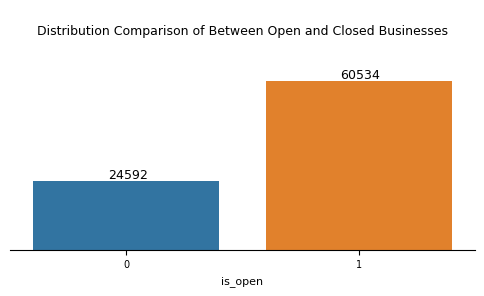

In [263]:

results = eat_drink_business_df.is_open
params = {'axes.spines.top':False, 'axes.spines.right': False, 'axes.spines.left': False, 'axes.labelsize' : 8, 
          'xtick.labelsize' : 7, 'axes.titlesize':9}
matplotlib.rcParams.update(params)
fig = plt.figure(constrained_layout=False, figsize=(6, 2.3))
ax = fig.gca()
ax.set_title('\nDistribution Comparison of Between Open and Closed Businesses\n\n')
p = sns.countplot(x=results, ax=ax)
ax.yaxis.set_visible(False)
counts=pd.Series(results).value_counts().sort_values(ascending=True)
for i, count in enumerate(counts):
    ax.text(i-.08, count+1000, '{}'.format(count), fontsize=9)

matplotlib.rcParams.update(matplotlib.rcParamsDefault);


> ## 

<br>

### Reviews From Selected Business
  
<p>

In [152]:

# Filter corresponding reviews from the selected businesses
eat_drink_review_df = review_df.query('business_id in @eat_drink_business_df.business_id')


In [228]:

df_info(eat_drink_review_df)
eat_drink_review_df.sample(1)



Shape : (5661417, 9)
              COLUMNS                DATA TYPE     HAS NULL    COUNTS    # UNIQUE

  1.  review_id                      object         False     5661417    5661417
  2.  user_id                        object         False     5661417    1478579
  3.  business_id                    object         False     5661417      85126
  4.  stars                          float64        False     5661417          5
  5.  useful                         int64          False     5661417        235
  6.  funny                          int64          False     5661417        188
  7.  cool                           int64          False     5661417        187
  8.  text                           object         False     5661417    5647590
  9.  date                           object         False     5661417    5578252


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1792167,YXJGpFL6liNn6RLRqgYd6A,zpe4jkNCQGutFtBEfcyXqw,g3w01guDiTLszguA3vUrSg,4.0,0,0,0,"I like this place alot great costumer service and the prices are normal this is not cheap food so expect your bill to be over 100 for 2 people which is great. We were able to take our hot pot food to go since we order alot and were full, i love that because i hate waisting food. This will be our spot !",2016-09-26 10:05:44


<br>

### Checkins From Selected Business

Extract all checkins from the selected businesses and transform checkins into counts of day of week people checked in.
  
<p> 

In [225]:

# Filter checkins from selected businesses only

eat_drink_checkin_df = checkin_df.query('business_id in @eat_drink_business_df.business_id')
df_info(eat_drink_checkin_df)
eat_drink_checkin_df.head(1)


Shape : (82131, 2)
              COLUMNS                DATA TYPE     HAS NULL    COUNTS    # UNIQUE

  1.  business_id                    object         False       82131      82131
  2.  date                           object         False       82131      82131


,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016-10-15 02:45:18, 2016-11-18 01:54:50, 2017-04-20 18:39:06, 2017-05-03 17:58:02, 2019-03-19 22:04:48"


<br>

Transform checkins into counts of day-of-week people checked-in.

In [222]:

temp = []
for idx, row in eat_drink_checkin_df.iterrows():
    
    # split the dates from a str object
    checkins = row['date'].split() 
    
    dow = {'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0}

    for a_checkin in checkins:
        
        # skip time component of the checkin
        if '-' not in a_checkin:
            continue
        
        day = datetime.datetime(int(a_checkin.split('-')[0]),
                                int(a_checkin.split('-')[1]),
                                int(a_checkin.split('-')[2])).strftime('%w')
        dow[str(day)] = dow[str(day)] + 1
        
    dow['business_id'] = row['business_id']
    temp.append(dow)


<br>

Display the newly-transformed dataset.

<p>

In [227]:

eat_drink_checkin_df = pd.DataFrame(temp)
df_info(eat_drink_checkin_df)
eat_drink_checkin_df.sample(3)



Shape : (82131, 8)
              COLUMNS                DATA TYPE     HAS NULL    COUNTS    # UNIQUE

  1.  0                              int64          False       82131       1033
  2.  1                              int64          False       82131        744
  3.  2                              int64          False       82131        684
  4.  3                              int64          False       82131        696
  5.  4                              int64          False       82131        712
  6.  5                              int64          False       82131        796
  7.  6                              int64          False       82131       1039
  8.  business_id                    object         False       82131      82131


,0,1,2,3,4,5,6,business_id
18867,35,28,18,21,21,18,40,DiCfRiL3WX-vwkK85qrIjw
10689,1,2,0,2,0,1,3,7OiJBSmhxEYeCoEJlkqDYQ
11143,4,0,3,2,2,0,4,7l3HT3fDSM2Dl_7HRLNftA
